In [38]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [39]:


rawdata = pd.read_csv('../files/hr_raw_data.csv', index_col=0)



In [40]:
rawdata['education'].notnull().sum()

1678

In [41]:
rawdata['education'].unique()

array([3, 4, 2, 1, 5], dtype=int64)

#### DATA NOTES:

- Employeenumber = PRIMARY KEY : THERE ARE DUPLICATES
- 


TO CHANGE:

- Distance from home has negative values, replace for 'null'?
- Nan to Null?
- Genger from int to tag

- dailyrate , salary, sameasmonthlyincome: remove $ and change type to float(2)
- Group all salary rates near by

RENAME:

- Rename from: Attrition to: rehired
- Rename from: Salary to: AnnualSalary
- Rename from: Education Field

DELETE: 
- employeecount: All values are same / unique = rawdata['employeecount'].unique() and can be done by employee number

DUPLICATES:
- Employeenumber / dupli = rawdata['employeenumber'].duplicated()


In [42]:
rawdata.duplicated().sum()

64

Potenciales drops de filas:

In [43]:
rawdata[rawdata.duplicated()] #buscar para mover la columna de employeenumber

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
1614,35,No,NaN,1032.487286,NaN,18,5,Life Sciences,1,178,2,0,NaN,3,3,sAlES eXeCuTIVe,1,Married,"8339,32$","21682,23$",1,Y,NaN,22,"4,0",4,NaN,1,"9,0",3,"2,0",9,NaN,1,8,"8339,32$",1988,NaN,NaN,NaN,True
1615,59,No,travel_rarely,290.035510,Human Resources,6,2,Medical,1,853,2,0,NaN,3,1,humAN resoURCEs,3,Married,"2342,59$","6090,75$",8,Y,NaN,17,"3,0",4,Part Time,0,NaN,2,"2,0",2,NaN,2,2,"2342,59$",1964,"28111,13$",humAN resoURCEs - Human Resources,NaN,False
1616,30,No,travel_rarely,1032.487286,NaN,5,3,NaN,1,112,2,1,129.060911,3,3,SalES ExeCuTIVe,4,NaN,"8339,32$","21682,23$",2,Y,No,12,"3,0",3,Part Time,1,NaN,2,"3,0",10,NaN,7,4,"8339,32$",1993,"100071,84$",NaN,NaN,True
1617,34,Yes,travel_rarely,556.256661,NaN,24,4,NaN,1,159,1,1,NaN,2,2,sAles EXecutiVE,2,Single,NaN,"11681,39$",0,Y,Yes,23,"4,0",3,Part Time,0,"16,0",2,"4,0",15,NaN,10,10,NaN,1989,"53914,11$",NaN,NaN,0
1618,47,No,NaN,290.035510,NaN,2,4,Life Sciences,1,969,4,1,NaN,2,1,SALeS RePreSenTATiVe,4,Single,"2342,59$","6090,75$",1,NaN,Yes,18,"3,0",1,NaN,0,"3,0",3,"2,0",3,NaN,1,2,"2342,59$",1976,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,43,No,NaN,488.944444,NaN,-26,3,Medical,1,824,2,1,NaN,4,1,rESEaRcH SciEnTiST,3,Single,"3949,17$","10267,83$",4,NaN,NaN,12,"3,0",4,NaN,0,NaN,2,"3,0",3,NaN,1,2,"3949,17$",1980,NaN,NaN,NaN,Yes
1674,47,No,NaN,1973.984127,NaN,26,4,NaN,1,1087,4,1,NaN,3,5,mANager,3,Married,"15943,72$","41453,67$",3,Y,No,11,"3,0",3,Full Time,1,"27,0",2,"3,0",5,NaN,1,0,"15943,72$",1976,"191324,62$",NaN,NaN,False
1675,29,No,travel_rarely,290.035510,NaN,15,3,NaN,1,528,3,0,NaN,3,1,reSearch sCienTiSt,4,NaN,NaN,"6090,75$",1,NaN,No,19,"3,0",1,Part Time,0,"6,0",1,"3,0",6,NaN,1,5,NaN,1994,"28111,13$",NaN,NaN,False
1676,47,No,travel_rarely,1032.487286,NaN,4,3,Life Sciences,1,76,3,1,NaN,2,3,maNufACTURING DIREctOr,2,Divorced,"8339,32$","21682,23$",8,NaN,Yes,12,NaN,3,Part Time,1,NaN,4,"3,0",22,NaN,14,10,"8339,32$",1976,"100071,84$",NaN,NaN,Yes


In [44]:
rawdata[rawdata.duplicated(subset='employeenumber', keep='first')].sort_values('employeenumber')

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
1656,41,No,NaN,1712.182540,NaN,2,5,NaN,1,9,2,1,NaN,3,4,mANAGEr,1,Married,"13829,17$","35955,83$",7,NaN,No,16,"3,0",2,Full Time,1,"22,0",2,"3,0",18,NaN,11,8,"13829,17$",1982,"165950,00$",NaN,NaN,True
1652,36,No,NaN,610.174603,NaN,5,2,NaN,1,61,4,0,NaN,3,2,lAboratORy TeChNiCiaN,2,Single,"4928,33$","12813,67$",8,Y,No,16,"3,0",4,Full Time,0,"16,0",3,"4,0",13,NaN,3,7,"4928,33$",1987,"59140,00$",NaN,NaN,1
1676,47,No,travel_rarely,1032.487286,NaN,4,3,Life Sciences,1,76,3,1,NaN,2,3,maNufACTURING DIREctOr,2,Divorced,"8339,32$","21682,23$",8,NaN,Yes,12,NaN,3,Part Time,1,NaN,4,"3,0",22,NaN,14,10,"8339,32$",1976,"100071,84$",NaN,NaN,Yes
1649,29,No,travel_rarely,1032.487286,NaN,21,4,Life Sciences,1,108,2,1,NaN,4,3,maNufaCturing direcTOr,1,Divorced,"8339,32$","21682,23$",1,Y,No,11,"3,0",3,NaN,1,"10,0",1,"3,0",10,NaN,8,8,"8339,32$",1994,NaN,NaN,NaN,0
1616,30,No,travel_rarely,1032.487286,NaN,5,3,NaN,1,112,2,1,129.060911,3,3,SalES ExeCuTIVe,4,NaN,"8339,32$","21682,23$",2,Y,No,12,"3,0",3,Part Time,1,NaN,2,"3,0",10,NaN,7,4,"8339,32$",1993,"100071,84$",NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,34,Yes,non-travel,547.238095,NaN,-37,3,Marketing,1,1532,1,0,NaN,4,2,SalES exEcutIve,4,NaN,"4420,00$","11492,00$",8,NaN,Yes,13,"3,0",2,NaN,0,NaN,3,"2,0",5,NaN,0,4,"4420,00$",1989,NaN,NaN,NaN,1
1637,35,No,travel_rarely,1032.487286,NaN,16,3,Life Sciences,1,1567,4,0,NaN,3,3,HEalTHCArE rEpresEnTaTIvE,3,NaN,NaN,"21682,23$",4,NaN,Yes,12,"3,0",3,Part Time,0,"10,0",2,"3,0",8,NaN,0,0,NaN,1988,"100071,84$",NaN,NaN,1
1638,48,No,travel_rarely,417.960317,NaN,2,5,NaN,1,1568,2,1,NaN,3,2,sALES EXEcuTIVe,4,Married,"3375,83$","8777,17$",2,NaN,No,14,"3,0",1,Part Time,1,"14,0",2,"3,0",9,NaN,6,7,"3375,83$",1975,"40510,00$",NaN,NaN,True
1657,45,No,travel_rarely,495.753968,NaN,2,3,Other,1,1569,4,0,NaN,3,2,sAles executiVe,2,NaN,NaN,"10410,83$",0,NaN,No,19,"3,0",2,Part Time,1,NaN,3,"4,0",8,NaN,3,7,NaN,1978,"48050,00$",NaN,NaN,False


In [45]:
rawdata = rawdata.drop_duplicates(keep='first')

In [46]:
rawdata.shape

(1614, 41)

In [47]:
#ponemos drop = False en lugar de drop = True,para que no elimine la columna de employeenumber
rawdata.set_index('employeenumber', drop=False, inplace=True) 

In [48]:
rawdata.head(1)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes


In [49]:
rawdata.drop(['numberchildren', 'employeecount', 'over18', 'sameasmonthlyincome'], axis=1, inplace=True)

In [50]:
title_mapping = {
    "employeenumber": "employee_number",
    "gender": "gender",
    "datebirth": "birth_year",
    "age": "age",
    "maritalstatus": "marital_status",
    "jobrole": "job_title",
    "department": "department",
    "attrition": "terminated",
    "standardhours": "standard_hours",
    "monthlyincome": "monthly_income",
    "remotework": "remote",
    "businesstravel": "business_travel",
    "dailyrate": "daily_rate",
    "distancefromhome": "dist_home",
    "education": "education_scale",
    "educationfield": "education",
    "environmentsatisfaction": "env_sat_rate",
    "hourlyrate": "hourly_rate",
    "jobinvolvement": "job_involvement",
    "joblevel": "job_level",
    "jobsatisfaction": "job_sat_rate",
    "monthlyrate": "monthly_rate",
    "numcompaniesworked": "num_comp_worked",
    "overtime": "over_time",
    "percentsalaryhike": "perc_salary_hike",
    "performancerating": "perf_rate",
    "relationshipsatisfaction": "relationship_sat_rate",
    "stockoptionlevel": "stock_opt_level",
    "totalworkingyears": "tot_working_year",
    "trainingtimeslastyear": "traning_times_last_year",
    "worklifebalance": "work_life_balance",
    "yearsatcompany": "year_at_comp",
    "yearsincurrentrole": "year_current_role",
    "yearssincelastpromotion": "year_last_promotion",
    "yearswithcurrmanager": "year_current_mngr",
    "salary": "annual_salary",
    "roledepartament": "role_department"}

In [51]:
rawdata= rawdata.rename(columns=title_mapping)

In [52]:
rawdata[["role_1", "department_1"]]=rawdata["role_department"].str.split("-", expand=True).get([0, 1])

In [53]:
rawdata.head()

,age,terminated,business_travel,daily_rate,department,dist_home,education_scale,education,employee_number,env_sat_rate,gender,hourly_rate,job_involvement,job_level,job_title,job_sat_rate,marital_status,monthly_income,monthly_rate,num_comp_worked,over_time,perc_salary_hike,perf_rate,relationship_sat_rate,standard_hours,stock_opt_level,tot_working_year,traning_times_last_year,work_life_balance,year_at_comp,year_current_role,year_last_promotion,year_current_mngr,birth_year,annual_salary,role_department,remote,role_1,department_1
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,1972,"195370,00$",NaN,Yes,NaN,NaN
2,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,1971,"199990,00$",NaN,1,NaN,NaN
3,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,1981,"192320,00$",ManaGER - Research & Development,1,ManaGER,Research & Development
4,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,4,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,NaN,5,6,1976,"171690,00$",NaN,False,NaN,NaN
5,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,5,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,1977,NaN,NaN,0,NaN,NaN


In [54]:
rawdata.loc[:15, ["job_title", "role_1", "department", "department_1", "role_department"]]

,job_title,role_1,department,department_1,role_department
employeenumber,,,,,
1,resEArch DIREcToR,NaN,NaN,NaN,NaN
2,ManAGeR,NaN,NaN,NaN,NaN
3,ManaGER,ManaGER,Research & Development,Research & Development,ManaGER - Research & Development
4,ReseArCH DIrECtOr,NaN,NaN,NaN,NaN
5,sAleS EXECUtIve,NaN,NaN,NaN,NaN
6,MANAger,MANAger,Research & Development,Research & Development,MANAger - Research & Development
7,Sales ExeCutIVe,NaN,NaN,NaN,NaN
8,Sales eXEcUTiVe,NaN,NaN,NaN,NaN
9,mANAGEr,NaN,NaN,NaN,NaN


In [55]:
rawdata.drop(['role_1', 'department_1', 'role_department'], axis=1, inplace=True)

In [56]:
rawdata.head()

,age,terminated,business_travel,daily_rate,department,dist_home,education_scale,education,employee_number,env_sat_rate,gender,hourly_rate,job_involvement,job_level,job_title,job_sat_rate,marital_status,monthly_income,monthly_rate,num_comp_worked,over_time,perc_salary_hike,perf_rate,relationship_sat_rate,standard_hours,stock_opt_level,tot_working_year,traning_times_last_year,work_life_balance,year_at_comp,year_current_role,year_last_promotion,year_current_mngr,birth_year,annual_salary,remote
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,1972,"195370,00$",Yes
2,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,1971,"199990,00$",1
3,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,1981,"192320,00$",1
4,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,4,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,NaN,5,6,1976,"171690,00$",False
5,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,5,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,1977,NaN,0


In [57]:
# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, kstest

In [58]:
df = pd.read_csv('hr_raw_data_v2.csv')


In [59]:
df.head(1)

,employee_number,gender,birth_year,age,marital_status,dist_home,job_title,department,departured,year_at_comp,standard_hours,remote,business_travel,over_time,job_level,stock_opt_level,traning_times_last_year,perf_rate,year_last_promotion,year_current_mngr,education_field,education_scale,annual_salary,monthly_income,daily_rate,perc_salary_hike,env_sat_rate,job_involvement,job_sat_rate,relationship_sat_rate,work_life_balance,num_comp_worked,tot_working_year
0,1,M,1972,51.0,Unknown,6,Research Director,Research & Development,No,20,Full Time,Yes,Unknown,No,5,0,5,3.0,15,15,Unknown,3,195370.0,16280.83,2015.722222,13,1,3,3,3,3.0,7,NaN


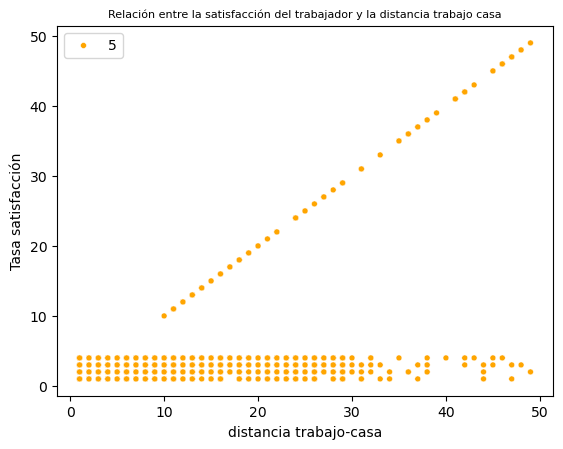

In [60]:
sns.scatterplot(x = "dist_home", 
                y = "env_sat_rate", 
                data = df, 
                size = 5, 
                color = "orange")

# ponemos los nombres de los ejes
plt.ylabel("Tasa satisfacción")
plt.xlabel("distancia trabajo-casa")
plt.title("Relación entre la satisfacción del trabajador y la distancia trabajo casa", fontsize = 8);

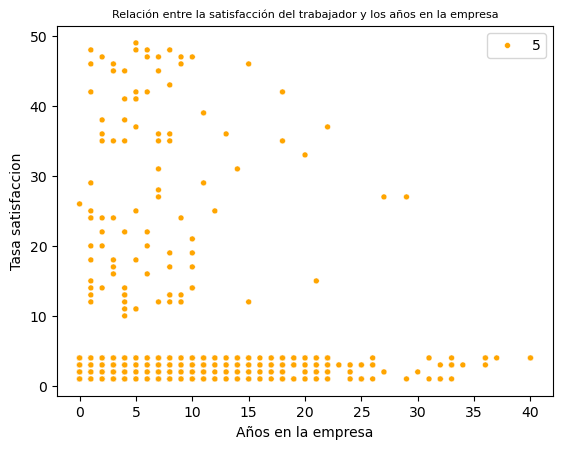

In [61]:
sns.scatterplot(x = "year_at_comp", 
                y = "env_sat_rate", 
                data = df, 
                size = 5, 
                color = "orange")

# ponemos los nombres de los ejes
plt.xlabel("Años en la empresa")
plt.ylabel("Tasa satisfaccion")
plt.title("Relación entre la satisfacción del trabajador y los años en la empresa", fontsize = 8);

In [62]:
df.head(1)

,employee_number,gender,birth_year,age,marital_status,dist_home,job_title,department,departured,year_at_comp,standard_hours,remote,business_travel,over_time,job_level,stock_opt_level,traning_times_last_year,perf_rate,year_last_promotion,year_current_mngr,education_field,education_scale,annual_salary,monthly_income,daily_rate,perc_salary_hike,env_sat_rate,job_involvement,job_sat_rate,relationship_sat_rate,work_life_balance,num_comp_worked,tot_working_year
0,1,M,1972,51.0,Unknown,6,Research Director,Research & Development,No,20,Full Time,Yes,Unknown,No,5,0,5,3.0,15,15,Unknown,3,195370.0,16280.83,2015.722222,13,1,3,3,3,3.0,7,NaN


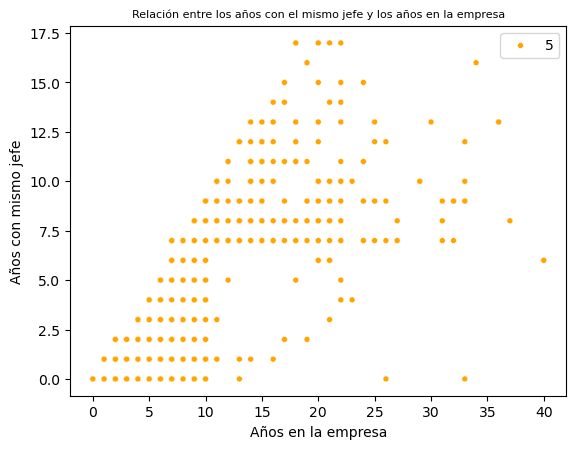

In [63]:
sns.scatterplot(x = "year_at_comp", 
                y = "year_current_mngr", 
                data = df, 
                size = 5, 
                color = "orange")

# ponemos los nombres de los ejes
plt.xlabel("Años en la empresa")
plt.ylabel("Años con mismo jefe")
plt.title("Relación entre los años con el mismo jefe y los años en la empresa", fontsize = 8);

In [64]:
df.head(1)

,employee_number,gender,birth_year,age,marital_status,dist_home,job_title,department,departured,year_at_comp,standard_hours,remote,business_travel,over_time,job_level,stock_opt_level,traning_times_last_year,perf_rate,year_last_promotion,year_current_mngr,education_field,education_scale,annual_salary,monthly_income,daily_rate,perc_salary_hike,env_sat_rate,job_involvement,job_sat_rate,relationship_sat_rate,work_life_balance,num_comp_worked,tot_working_year
0,1,M,1972,51.0,Unknown,6,Research Director,Research & Development,No,20,Full Time,Yes,Unknown,No,5,0,5,3.0,15,15,Unknown,3,195370.0,16280.83,2015.722222,13,1,3,3,3,3.0,7,NaN


In [65]:
df_estadisticos_cat = df.select_dtypes(include = 'O').describe().T

In [66]:
df_estadisticos_cat['freq%'] = df_estadisticos_cat['freq'].values/df.shape[0]*100

In [67]:
df_estadisticos_cat

,count,unique,top,freq,freq%
gender,1614,2,M,971,60.16109
marital_status,1614,4,Unknown,651,40.334572
job_title,1614,9,Sales Executive,369,22.862454
department,1614,4,Research & Development,1001,62.019827
departured,1614,2,No,1355,83.952912
standard_hours,1276,2,Part Time,888,55.018587
remote,1614,2,Yes,1000,61.957869
business_travel,1614,4,Unknown,772,47.831475
over_time,1614,3,No,682,42.255266
education_field,1614,7,Unknown,745,46.158612


In [68]:
df['department'].unique()

array(['Research & Development', 'Unknown', 'Sales', 'Human Resources'],
      dtype=object)

In [69]:
# filtramos los datos para obtener los grupos. Estos grupos van a ser series de datos
grupo_research = df[df['department'] == 'Research & Development'] [['annual_salary','standard_hours']]
grupo_unknown = df[df['department'] == 'Unknown'] [['annual_salary','standard_hours']]
grupo_sales = df[df['department'] == 'Sales'] [['annual_salary','standard_hours']]
grupo_hhrr = df[df['department'] == 'Human Resources'] [['annual_salary','standard_hours']]

In [70]:
lista = ['Research & Development', 'Unknown', 'Sales', 'Human Resources']

In [71]:
df_grupo_research = pd.DataFrame(grupo_research )
df_grupo_unknown = pd.DataFrame(grupo_unknown)
df_grupo_sales = pd.DataFrame(grupo_sales)
df_grupo_hhrr = pd.DataFrame(grupo_hhrr)

In [72]:
#imprimimos las estadísticas:
for filtro in lista:
    print(filtro)
    display(df[df['department'] == filtro]['annual_salary'].describe().round(2).reset_index().T)
    print('-' * 40)

Research & Development


,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
annual_salary,1001.0,58414.13,43038.75,10090.0,28111.13,44220.0,64720.0,199730.0


----------------------------------------
Unknown


,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
annual_salary,91.0,167680.14,27964.12,100071.84,153407.07,170990.0,191324.62,199990.0


----------------------------------------
Sales


,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
annual_salary,464.0,61231.4,28763.74,10520.0,48387.5,53914.11,69690.0,187890.0


----------------------------------------
Human Resources


,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
annual_salary,58.0,45159.34,27708.86,20640.0,28111.13,28111.13,53914.11,153407.07


----------------------------------------


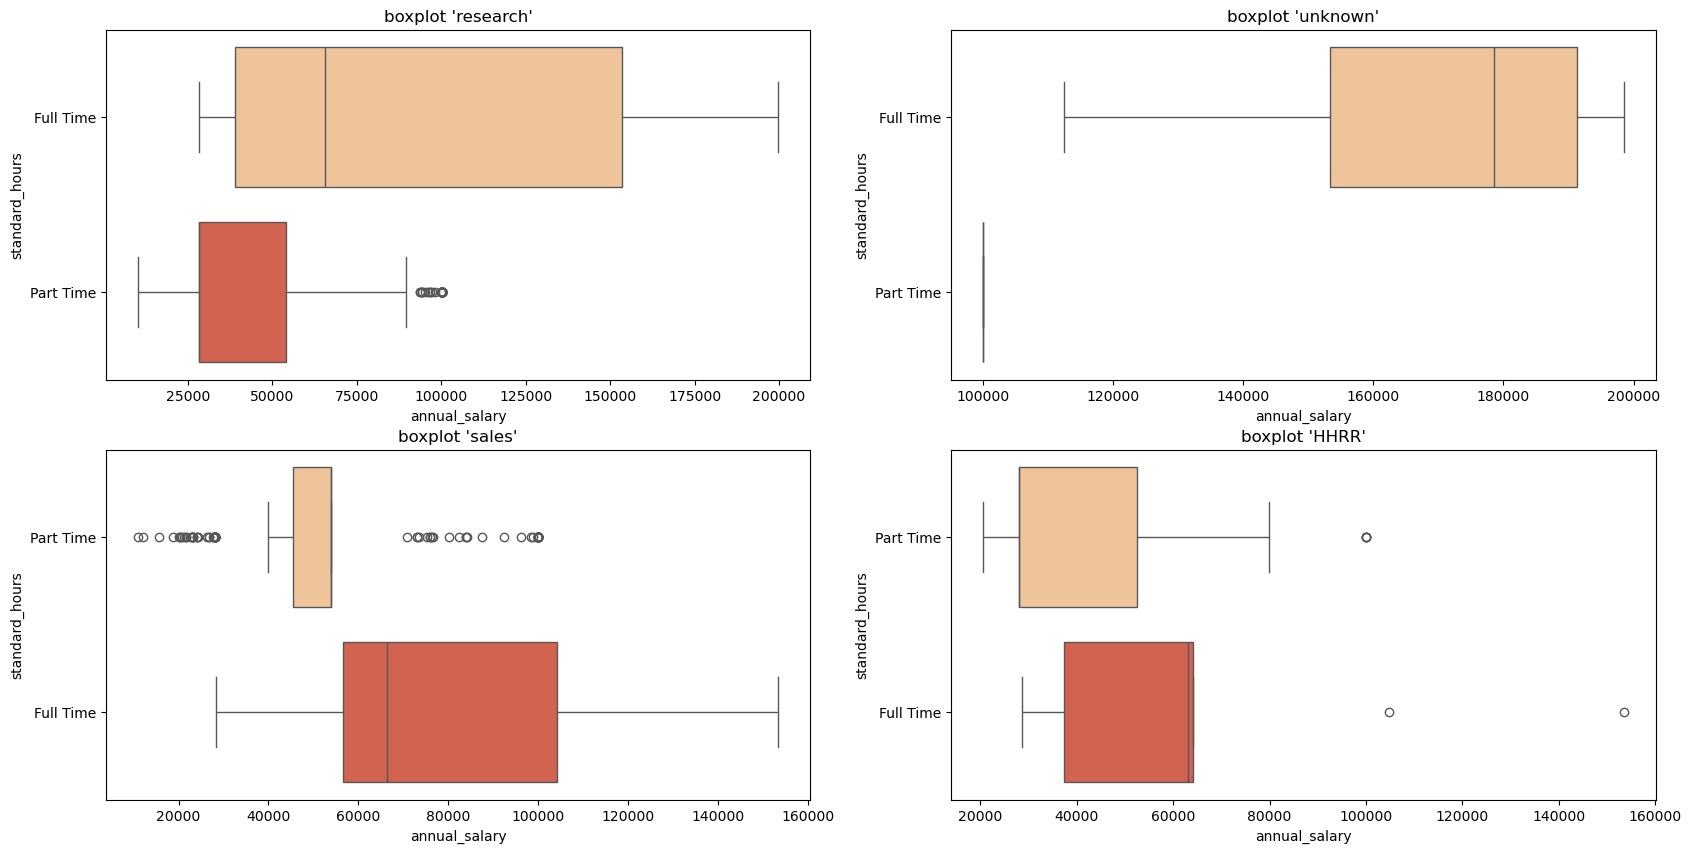

In [73]:
#Boxplot
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))

sns.boxplot(x = "annual_salary", 
            y = "standard_hours",
            data = df_grupo_research,
            palette = "OrRd", 
            ax = axes[0,0])
axes[0,0].set_title("boxplot 'research'")

sns.boxplot(x = "annual_salary",
            y = "standard_hours", 
            data = df_grupo_unknown,
            palette = "OrRd",  
            ax = axes[0,1])
axes[0,1].set_title("boxplot 'unknown'")


sns.boxplot(x = "annual_salary",
            y = "standard_hours",
            data = df_grupo_sales,
            palette = "OrRd",  
            ax = axes[1,0])
axes[1,0].set_title("boxplot 'sales'")

sns.boxplot(x = "annual_salary",
            y = "standard_hours", 
            data = df_grupo_hhrr,
            palette = "OrRd",   
            ax = axes[1,1])
axes[1,1].set_title("boxplot 'HHRR'");

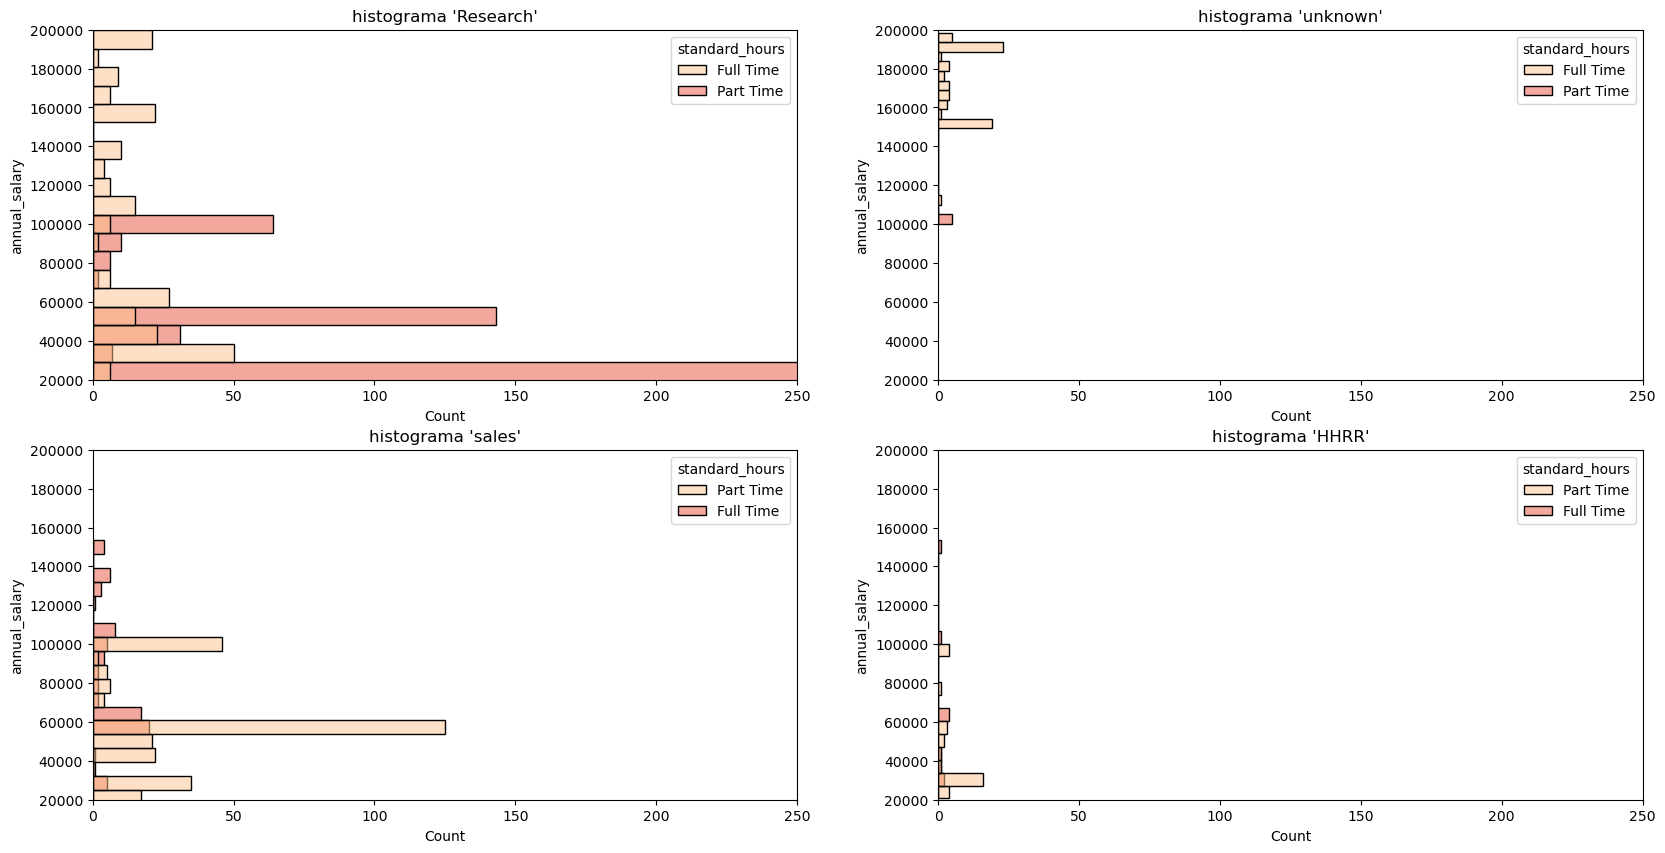

In [74]:
#Histograma
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))

sns.histplot(y = "annual_salary",
            hue = "standard_hours", 
            data = df_grupo_research, 
            palette = "OrRd", 
            bins = 20, 
            ax = axes[0,0])
axes[0,0].set_title("histograma 'Research'")

sns.histplot(y = "annual_salary",
            hue = "standard_hours",  
            data = df_grupo_unknown, 
            palette = "OrRd", 
            bins = 20, 
            ax = axes[0,1])
axes[0,1].set_title("histograma 'unknown'")


sns.histplot(y = "annual_salary",
            hue = "standard_hours",  
            data = df_grupo_sales, 
            palette = "OrRd", 
            bins = 20, 
            ax = axes[1,0])
axes[1,0].set_title("histograma 'sales'")

sns.histplot(y = "annual_salary",
            hue = "standard_hours",  
            data = df_grupo_hhrr, 
            palette = "OrRd", 
            bins = 20, 
            ax = axes[1,1])
axes[1,1].set_title("histograma 'HHRR'")


#ponemos la misma escala en los ejes:
#eje x, para asegurarnos que coge bien el mes núm 12:
axes[0,0].set_xlim(0,250) 
axes[0,1].set_xlim(0,250) 
axes[1,0].set_xlim(0,250) 
axes[1,1].set_xlim(0,250) 

#eje y, hasta 120.000:
axes[0,0].set_ylim(20000,200000) 
axes[0,1].set_ylim(20000,200000) 
axes[1,0].set_ylim(20000,200000) 
axes[1,1].set_ylim(20000,200000);
